# Comprehensive Analysis of Taxi Services and Weather Conditions Impacting Trip Duration in Chicago

# Content

1. Introduction
2. Develop a code to parse weather data for Chicago in November 2017 from the website: Weather Chicago 2017.
3. Exploratory Data Analysis (SQL)
    * 3.1 Determine the number of taxi trips for each taxi company on November 15-16, 2017.
    * 3.2 Determine the number of trips for each taxi company whose name includes the words 'yellow' or 'blue' on November 1-7, 2017.
    * 3.3 Determine the number of trips for both Flash Cab and Taxi Affiliation Services.
4. Hypothesis Testing. Test the hypothesis that the duration of trips from the Loop to O'Hare International Airport changes when it rains on Saturdays.
5. Exploratory Data Analysis (Python)
6. General Conclusion

# Introduction

Analyze competitor data and test hypotheses related to the impact of weather on trip frequency for a ride-sharing company launching in Chicago.

# Objectives

1. Identify patterns in the data.
2. Understand passenger preferences and the impact of external factors on trips.

# Steps

1. Weather Data Parsing: Develop a code to parse weather data for Chicago in November 2017 from the website: Weather Chicago 2017.
2. Exploratory Data Analysis (SQL):
    * 2.1 Determine the number of taxi trips for each taxi company on November 15-16, 2017.
    * 2.2 Determine the number of trips for each taxi company whose name includes the words 'yellow' or 'blue' on November 1-7, 2017.
    * 2.3 Determine the number of trips for both Flash Cab and Taxi Affiliation Services.
3. Hypothesis Testing: Test the hypothesis that the duration of trips from the Loop to O'Hare International Airport changes when it rains on Saturdays.
4. Exploratory Data Analysis (Python):
    * 4.1 Load 2 CSV files.
    * 4.2 Import the files.
    * 4.3 Examine the data contents.
    * 4.4 Ensure data types are correct.
    * 4.5 Identify the top 10 drop-off locations.
    * 4.6 Create graphs showing the number of trips by taxi company and the top 10 drop-off locations.
    * 4.7 Draw conclusions based on the graphs and explain the results.
5. Hypothesis Testing (Python):
    * 5.1 Load the query data for trips from the Loop to O'Hare International Airport.
    * 5.2 Test the hypothesis: "The average duration of trips from the Loop to O'Hare International Airport changes on Saturdays."

# 4. Exploratory Data Analysis (Python)

**4.1 Load 2 CSV files**

**4.2 Import the files**

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta
from scipy import stats
from scipy.stats import levene

In [115]:
df1 = pd.read_csv('/datasets/project_sql_result_01.csv')
df2 = pd.read_csv('/datasets/project_sql_result_04.csv')

**4.3 Examine the data contents**

In [116]:
df1.sample(5)

,company_name,trips_amount
45,3011 - 66308 JBL Cab Inc.,25
6,City Service,8448
19,Chicago Medallion Leasing INC,1607
41,Chicago Star Taxicab,29
55,6057 - 24657 Richard Addo,13


In [117]:
df2.sample(5)

,dropoff_location_name,average_trips
39,Jefferson Park,74.333333
60,New City,22.933333
49,"Sauganash,Forest Glen",43.566667
51,Woodlawn,36.166667
45,Boystown,53.966667


In [118]:
# check nilai yang hilang df1
report = df1.isna().sum().to_frame()
report = report.rename(columns = {0: 'missing_values'})
report['% of total'] = (report['missing_values'] / df1.shape[0]).round(2)
report.sort_values(by = 'missing_values', ascending = False)

,missing_values,% of total
company_name,0,0.0
trips_amount,0,0.0


In [119]:
# check nilai yang hilang df2
report = df2.isna().sum().to_frame()
report = report.rename(columns = {0: 'missing_values'})
report['% of total'] = (report['missing_values'] / df2.shape[0]).round(2)
report.sort_values(by = 'missing_values', ascending = False)

,missing_values,% of total
dropoff_location_name,0,0.0
average_trips,0,0.0


**4.4 Ensure data types**

In [120]:
# check tipe data df1
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [121]:
# check tipe data df2
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


From the two imported datasets:

* Both datasets contain 2 columns.
* Dataset 1 has 64 rows.
* Dataset 2 has 94 rows.
* There are no missing values in either dataset.
* The data types for each column are appropriate and do not require any changes at this time.

**4.5 Identify the top 10 drop-off locations**

In [122]:
top10_dropoff = df2.sort_values(by='average_trips', ascending=False).head(10)

In [123]:
top10_dropoff

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


Based on the top 10 drop-off locations, the Loop is the most frequent drop-off location and O'Hare International Airport is the sixth most frequent drop-off location.

**4.6 Create graphs showing the number of trips by taxi company and the top 10 drop-off locations**

Text(0.5, 1.0, 'Jumlah Perjalanan per Perusahaan (Data 1)')

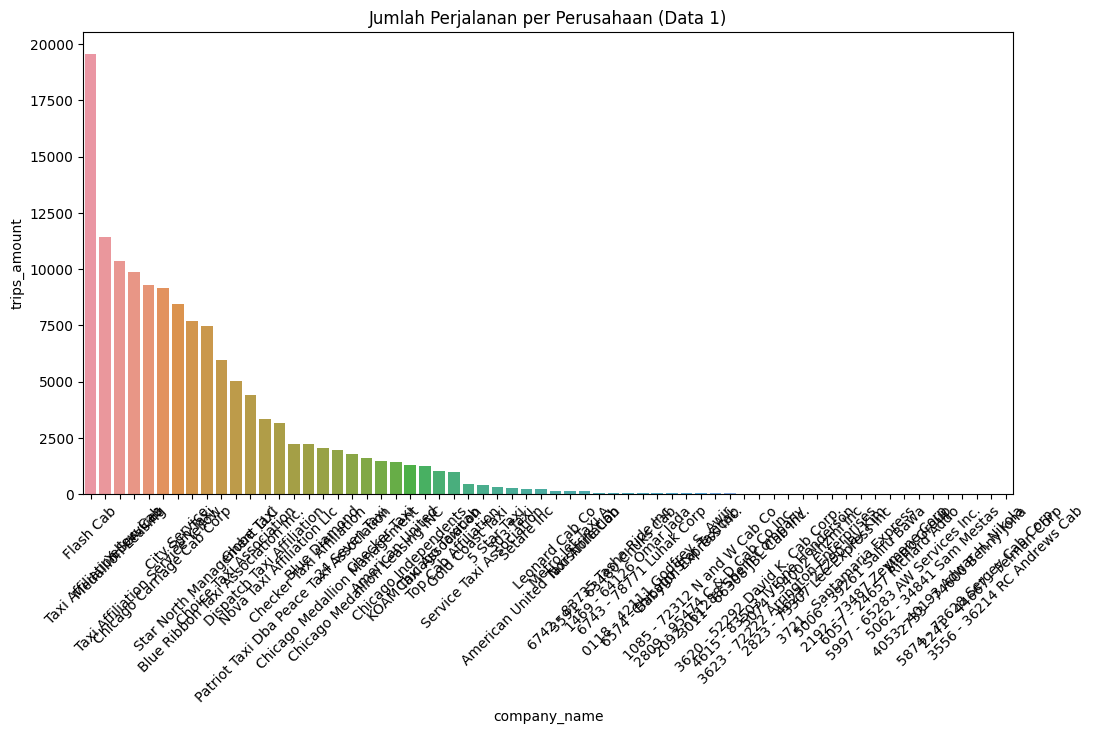

In [124]:
# Grafik perusahaan taksi
plt.figure(figsize=(12,6))
sns.barplot(data=df1, x='company_name', y='trips_amount')
plt.xticks(rotation=45)
plt.title('Jumlah Perjalanan per Perusahaan (Data 1)')

Text(0.5, 1.0, 'Rata-rata Perjalanan per Lokasi (Data 2)')

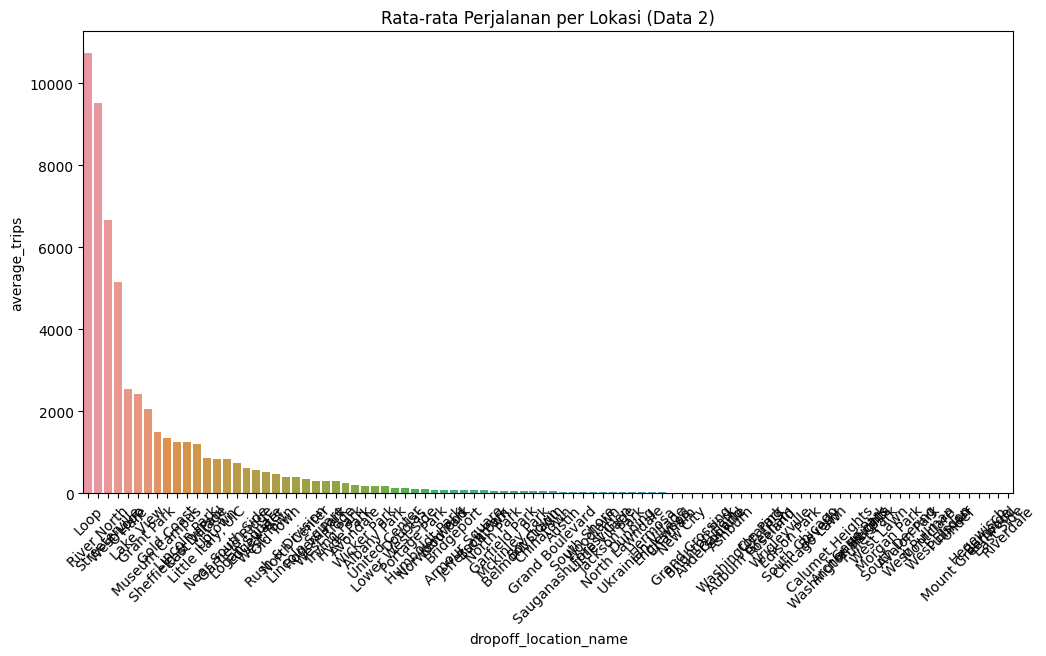

In [125]:
plt.figure(figsize=(12,6))
sns.barplot(x='dropoff_location_name', y='average_trips', data=df2)
plt.xticks(rotation=45)
plt.title('Rata-rata Perjalanan per Lokasi (Data 2)')

Text(0.5, 1.0, 'Top 10 Lokasi Penurunan Teratas berdasarkan Rata-rata Perjalanan')

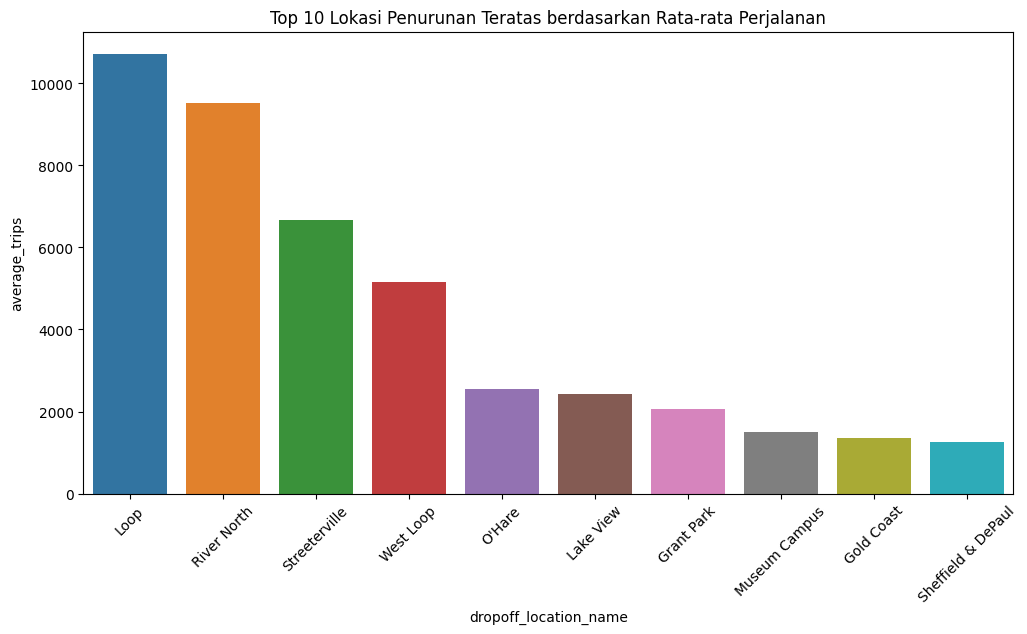

In [126]:
# Grafik 10 wilayah teratas berdasarkan jumlah pengantaran
plt.figure(figsize=(12,6))
sns.barplot(x='dropoff_location_name', y='average_trips', data=top10_dropoff)
plt.xticks(rotation=45)
plt.title('Top 10 Lokasi Penurunan Teratas berdasarkan Rata-rata Perjalanan')

**4.7 Conclusions Based on Created Graphs**

* Number of Trips by Taxi Company, Flash Cab has the highest number of trips, almost twice as many as the company with the third-highest number of trips.
* The most frequent drop-off locations are the Loop, River North, Streeterville, and West Loop. O'Hare International Airport ranks as the sixth most frequent drop-off location. The average number of trips to O'Hare is significantly lower compared to the top four locations. These findings suggest that the top four drop-off locations—Loop, River North, Streeterville, and West Loop—are major activity hubs, attracting a large number of trips.

# 5. Hypothesis Testing (Python)

**5.1 Load the query data for trips from the Loop to O'Hare International Airport**

In [127]:
df3 = pd.read_csv('/datasets/project_sql_result_07.csv')

In [128]:
df3

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


In [129]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [130]:
# mengubah tipe data float menjadi int di kolom duration_seconds
df3['duration_seconds'] = df3['duration_seconds'].astype(int)

In [131]:
# check nilai yang hilang df3
report = df3.isna().sum().to_frame()
report = report.rename(columns = {0: 'missing_values'})
report['% of total'] = (report['missing_values'] / df3.shape[0]).round(2)
report.sort_values(by = 'missing_values', ascending = False)

,missing_values,% of total
start_ts,0,0.0
weather_conditions,0,0.0
duration_seconds,0,0.0


In [132]:
# mengubah tipe data start_ts ke tipe data datetime
df3['start_ts'] = pd.to_datetime(df3['start_ts'])

In [133]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 25.2+ KB


The data has been adjusted as follows:

* There are no missing values.
* The dataset contains 1068 rows and 3 columns: `start_ts`, `weather_conditions`, and `duration_seconds`. Data types for each column have been appropriately set.

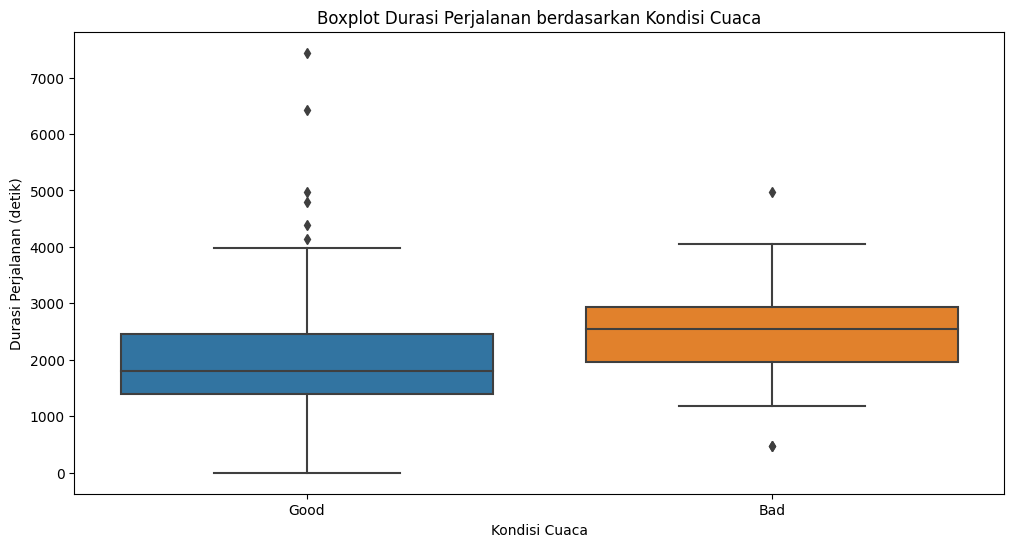

In [134]:
# check outliers df3
plt.figure(figsize=(12, 6))
sns.boxplot(x='weather_conditions', y='duration_seconds', data=df3)
plt.title("Boxplot Durasi Perjalanan berdasarkan Kondisi Cuaca")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Durasi Perjalanan (detik)")
plt.show()

In [135]:
Q1 = df3['duration_seconds'].quantile(0.25)
Q3 = df3['duration_seconds'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# menghapus outliers
df3_no_outliers = df3[(df3['duration_seconds'] >= lower_bound) & (df3['duration_seconds'] <= upper_bound)]

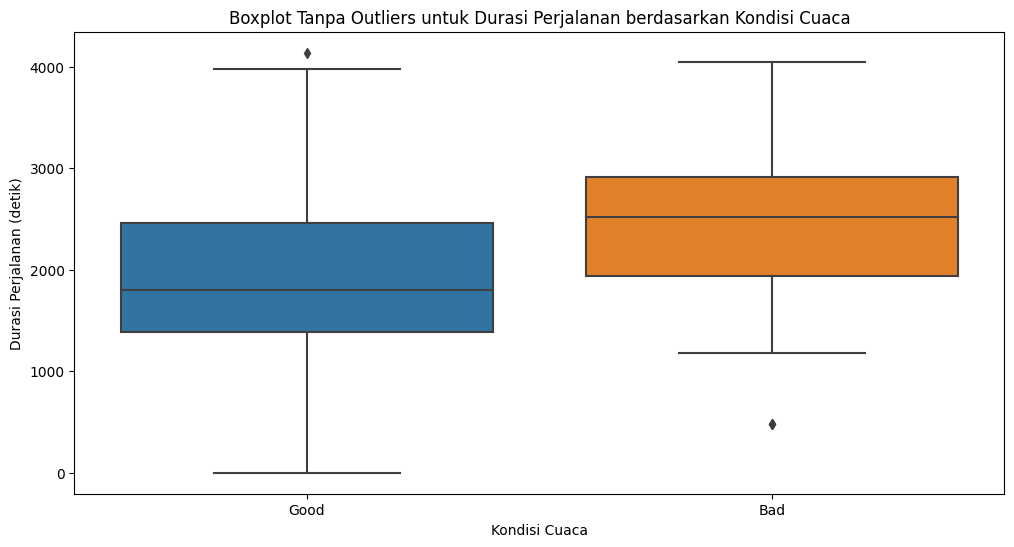

In [136]:
# boxplot df3 tanpa outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x='weather_conditions', y='duration_seconds', data=df3_no_outliers)
plt.title("Boxplot Tanpa Outliers untuk Durasi Perjalanan berdasarkan Kondisi Cuaca")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Durasi Perjalanan (detik)")
plt.show()

Initially, the dataset contained a significant number of outliers under the 'Good' weather conditions. These outliers have been removed. The cleaned dataset will be used for hypothesis testing.

**5.2 Test the hypothesis: "The average duration of trips from the Loop to O'Hare International Airport changes on Saturdays."**

* H0: The average duration of trips from the Loop to O'Hare International Airport does not change when it rains on Saturdays.
* H1: The average duration of trips from the Loop to O'Hare International Airport changes when it rains on Saturdays.

The significance level used for this test is 0.05.

In [137]:
# mencari nilai rata-rata
df3_avg = pd.pivot_table(df3, index='weather_conditions', values='duration_seconds', aggfunc='mean').reset_index()
df3_avg

,weather_conditions,duration_seconds
0,Bad,2427.205556
1,Good,1999.675676


In [138]:
df3_avg_no_outliers = pd.pivot_table(df3_no_outliers, index='weather_conditions', values='duration_seconds', aggfunc='mean').reset_index()
df3_avg_no_outliers

,weather_conditions,duration_seconds
0,Bad,2412.944134
1,Good,1979.266138


In [139]:
weather_bad= df3_no_outliers.loc[df3_no_outliers['weather_conditions']=='Bad', 'duration_seconds']
weather_good= df3_no_outliers.loc[df3_no_outliers['weather_conditions']=='Good', 'duration_seconds']

#uji levene
statistic, p_value_levene = levene(weather_bad, weather_good)

# print hasil uji Levene
print("Statistic:", statistic)
print("P-Value (Levene):", p_value_levene)

alpha = 0.05

if p_value_levene < alpha:
    print('Menerima H1')
else:
    print('Menerima H0')

Statistic: 0.24647542861629418
P-Value (Levene): 0.6196707782686355
Menerima H0


Since the p-value (0.6197) is greater than the significance level α (0.05), we do not have sufficient evidence to conclude that the variances of the two data groups are significantly different.

In [140]:
alpha = 0.05
p_value = ttest_ind(weather_bad, weather_good, nan_policy='omit', equal_var=True).pvalue
print(f'P-Value: {p_value}')
if p_value >= alpha:
    print('H0 Diterima: Durasi rata-rata perjalanan dari Loop ke Bandara Internasional OHare tidak berubah saat hujan di hari Sabtu')
else:
    print('H1 Diterima: Durasi rata-rata perjalanan dari Loop ke Bandara Internasional OHare berubah saat hujan di hari Sabtu')
print('Rata-rata perjalanan pada Bad conditions', weather_bad.mean())
print('Rata-rata perjalanan pada Good conditions', weather_good.mean())

P-Value: 1.2430038032744411e-13
H1 Diterima: Durasi rata-rata perjalanan dari Loop ke Bandara Internasional OHare berubah saat hujan di hari Sabtu
Rata-rata perjalanan pada Bad conditions 2412.9441340782123
Rata-rata perjalanan pada Good conditions 1979.2661381653454


**Findings**

The hypothesis supports H1.

**General Conclusion**

* From the data conditions:
    * Both datasets consist of 2 columns.
    * Dataset 1 has 64 rows, while dataset 2 has 94 rows.
    * There are no missing values in either dataset.
    * Data types for each column have been appropriately set.
    * Dataset 3 had its data type adjusted from float to int for easier analysis in hypothesis testing. It contains 1068 rows and 3 columns: start_ts, weather_conditions, and duration_seconds.

* The graph depicting the number of trips by each taxi company shows that Flash Cab is the most frequent, with almost twice the number of trips compared to the third most frequent company.
* The top drop-off locations include the Loop, River North, Streeterville, and West Loop. Notably, the number of trips from O'Hare to the top 10 drop-off locations is slightly lower than the top 4, suggesting that these top locations serve as significant activity hubs.
* The hypothesis testing results indicate that the average duration of trips from the Loop to O'Hare International Airport changes when it rains on Saturdays. With a low p-value, the hypothesis supports H1.
* The average trip duration during bad weather conditions is higher (2427.21 seconds) compared to good weather conditions, which have a lower average duration (1999.68 seconds).

**Recommendations**

Given the higher average trip duration during bad weather, consideration can be given to improving taxi services or availability during inclement weather. This could help reduce wait times and provide a better experience for customers.